In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths
%load_ext line_profiler
%load_ext memory_profiler
from time import time# timer for debug

    # gather results obtained from the runs

    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../MFUs/Runs_04-09-20_EasyPhase_L10/'
#foldername = '../Analysis_PSI/Runs_12-11-19_ssfMagnField/'
results_foldername = 'Results_14-09-20/'
os.makedirs('./' + foldername + results_foldername, exist_ok = True)
filenamelist = ['KEasyPhase_L10_it0_nsm131072_folder/backup',
                'KEasyPhase_L10_it1_nsm131072_folder/backup',
                'KEasyPhase_L10_it2_nsm131072_folder/backup',
                'KEasyPhase_L10_it3_nsm131072_folder/backup',
                'KEasyPhase_L10_it4_nsm131072_folder/backup',
                'KEasyPhase_L10_it5_nsm131072_folder/backup',
                'KEasyPhase_L10_it6_nsm131072_folder/backup',
                'KEasyPhase_L10_it7_nsm131072_folder/backup',
                'KEasyPhase_L10_it8_nsm131072_folder/backup',
                'KEasyPhase_L10_it9_nsm131072_folder/backup',
                'KEasyPhase_L10_it10_nsm131072_folder/backup',
                'KEasyPhase_L10_it11_nsm131072_folder/backup',
                'KEasyPhase_L10_it12_nsm131072_folder/backup',
                'KEasyPhase_L10_it13_nsm131072_folder/backup',
                'KEasyPhase_L10_it14_nsm131072_folder/backup',
                'KEasyPhase_L10_it15_nsm131072_folder/backup',
                'KEasyPhase_L10_it16_nsm131072_folder/backup',
                'KEasyPhase_L10_it17_nsm131072_folder/backup',
                'KEasyPhase_L10_it18_nsm131072_folder/backup',
                'KEasyPhase_L10_it19_nsm131072_folder/backup',
                'KEasyPhase_L10_it20_nsm131072_folder/backup',
                'KEasyPhase_L10_it21_nsm131072_folder/backup',
                'KEasyPhase_L10_it22_nsm131072_folder/backup',
                'KEasyPhase_L10_it23_nsm131072_folder/backup',
                'KEasyPhase_L10_it24_nsm131072_folder/backup',
                'KEasyPhase_L10_it25_nsm131072_folder/backup',
                'KEasyPhase_L10_it26_nsm131072_folder/backup',
                'KEasyPhase_L10_it27_nsm131072_folder/backup',
                'KEasyPhase_L10_it28_nsm131072_folder/backup',
                'KEasyPhase_L10_it29_nsm131072_folder/backup',
                'KEasyPhase_L10_it30_nsm131072_folder/backup',
                'KEasyPhase_L10_it31_nsm131072_folder/backup'
               ]
filenamelist = ['KEasyPhase_L10_it0_nsm524288_folder/backup',
                'KEasyPhase_L10_it1_nsm524288_folder/backup',
                'KEasyPhase_L10_it2_nsm524288_folder/backup',
                'KEasyPhase_L10_it3_nsm524288_folder/backup'
               ]
n = len(filenamelist)

In [4]:
mergeruns =True
nb_drop = 0
kw = {'mergeruns':mergeruns}

[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist, **kw)

s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt, **kw)


failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)], **kw)


nb  [131072, 131072, 131072, 131072] num_in_bin  [4, 4, 4, 4]


In [5]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

In [6]:
kw = {'binning':True, 'plzplot': False, 'minbin':127, 'RS':True, 
      'S0':np.log(2), 'mergeruns':mergeruns, 'nb_drop':nb_drop,
      'plotmin':80, 'plotmax':85, 'binning_level':0, 'jackknife':False}


%lprun -f af.LoadEnergyFromFile [t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC, t_h_S, t_h_Smin, t_h_Smax, MergedData ] = af.LoadEnergy(foldername, filenamelist, numsites, nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

if mergeruns:
    [t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC, t_h_S, t_h_Smin, t_h_Smax] = MergedData

Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
No jackknife analysis -- binning level:  0  -- number of bins:  131072
Negative variances num error:  1.0245582160450795e-11
(131072, 2, 216, 1)
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1

In [7]:
#t_MeanM, t_MeanMsq, t_varMeanM, t_varMeanMsq, Chi, ErrChi = \
# af.LoadMagnetisation(foldername, filenamelist, numsites, nb,
#                      stat_temps, temperatures, listfunctions, **kw)

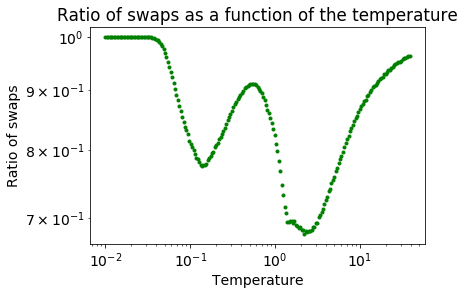

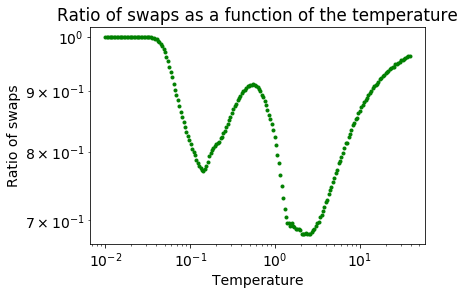

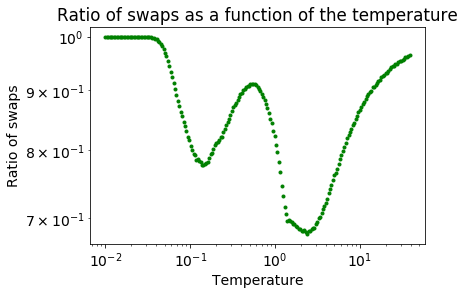

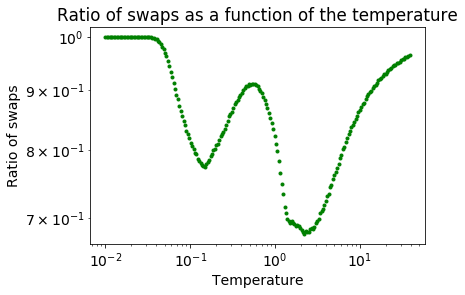

In [8]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

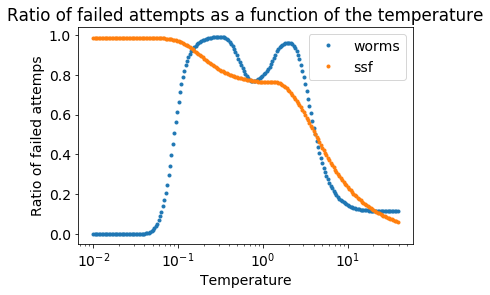

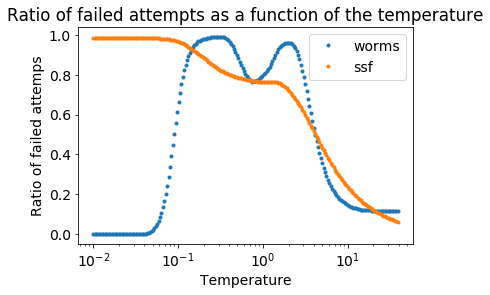

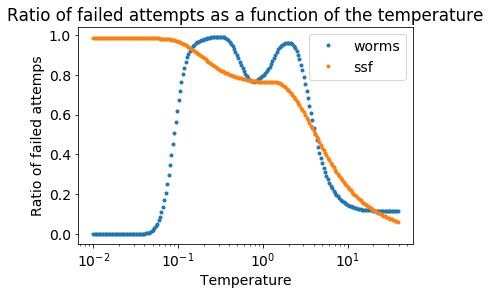

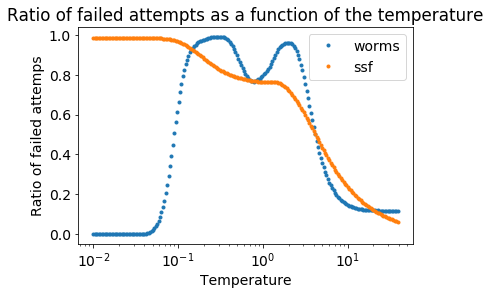

In [9]:
af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername,failed, failedssf)

In [10]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

In [11]:
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
S0 = np.log(2)
kw = {'gscheck': True, 'S0': S0, 'RS': True, 't_h_EntropyData': (t_h_S, t_h_Smin, t_h_Smax) }

print(t_h_Smin[0][0:5,0])
print(t_h_S[0][0:5,0])
print(t_h_Smax[0][0:5,0])

[0.110436 0.110436 0.110436 0.110436 0.110436]
[0.11204638 0.11204638 0.11204638 0.11204638 0.11204638]
[0.11365676 0.11365676 0.11365676 0.11365676 0.11365676]


In [12]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':12})
rc('text', usetex=True)
import os
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))

fm.findfont("serif", rebuild_if_missing=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

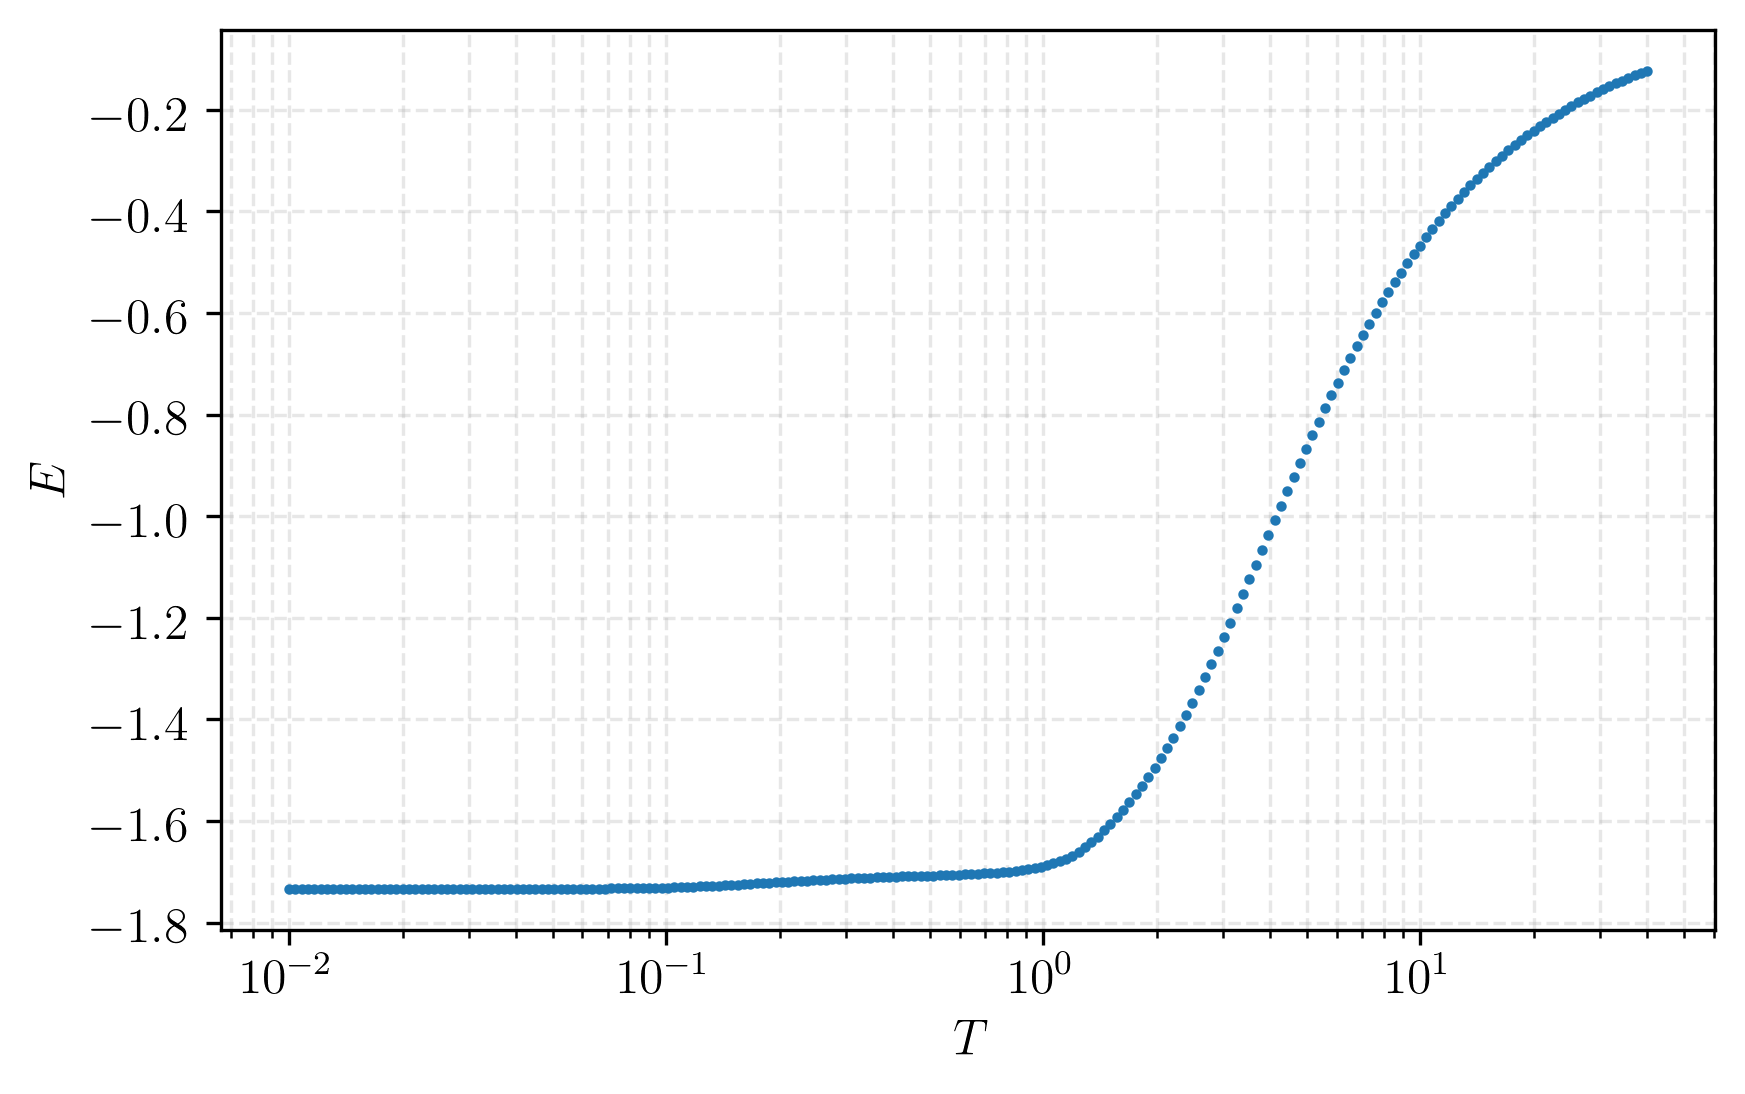

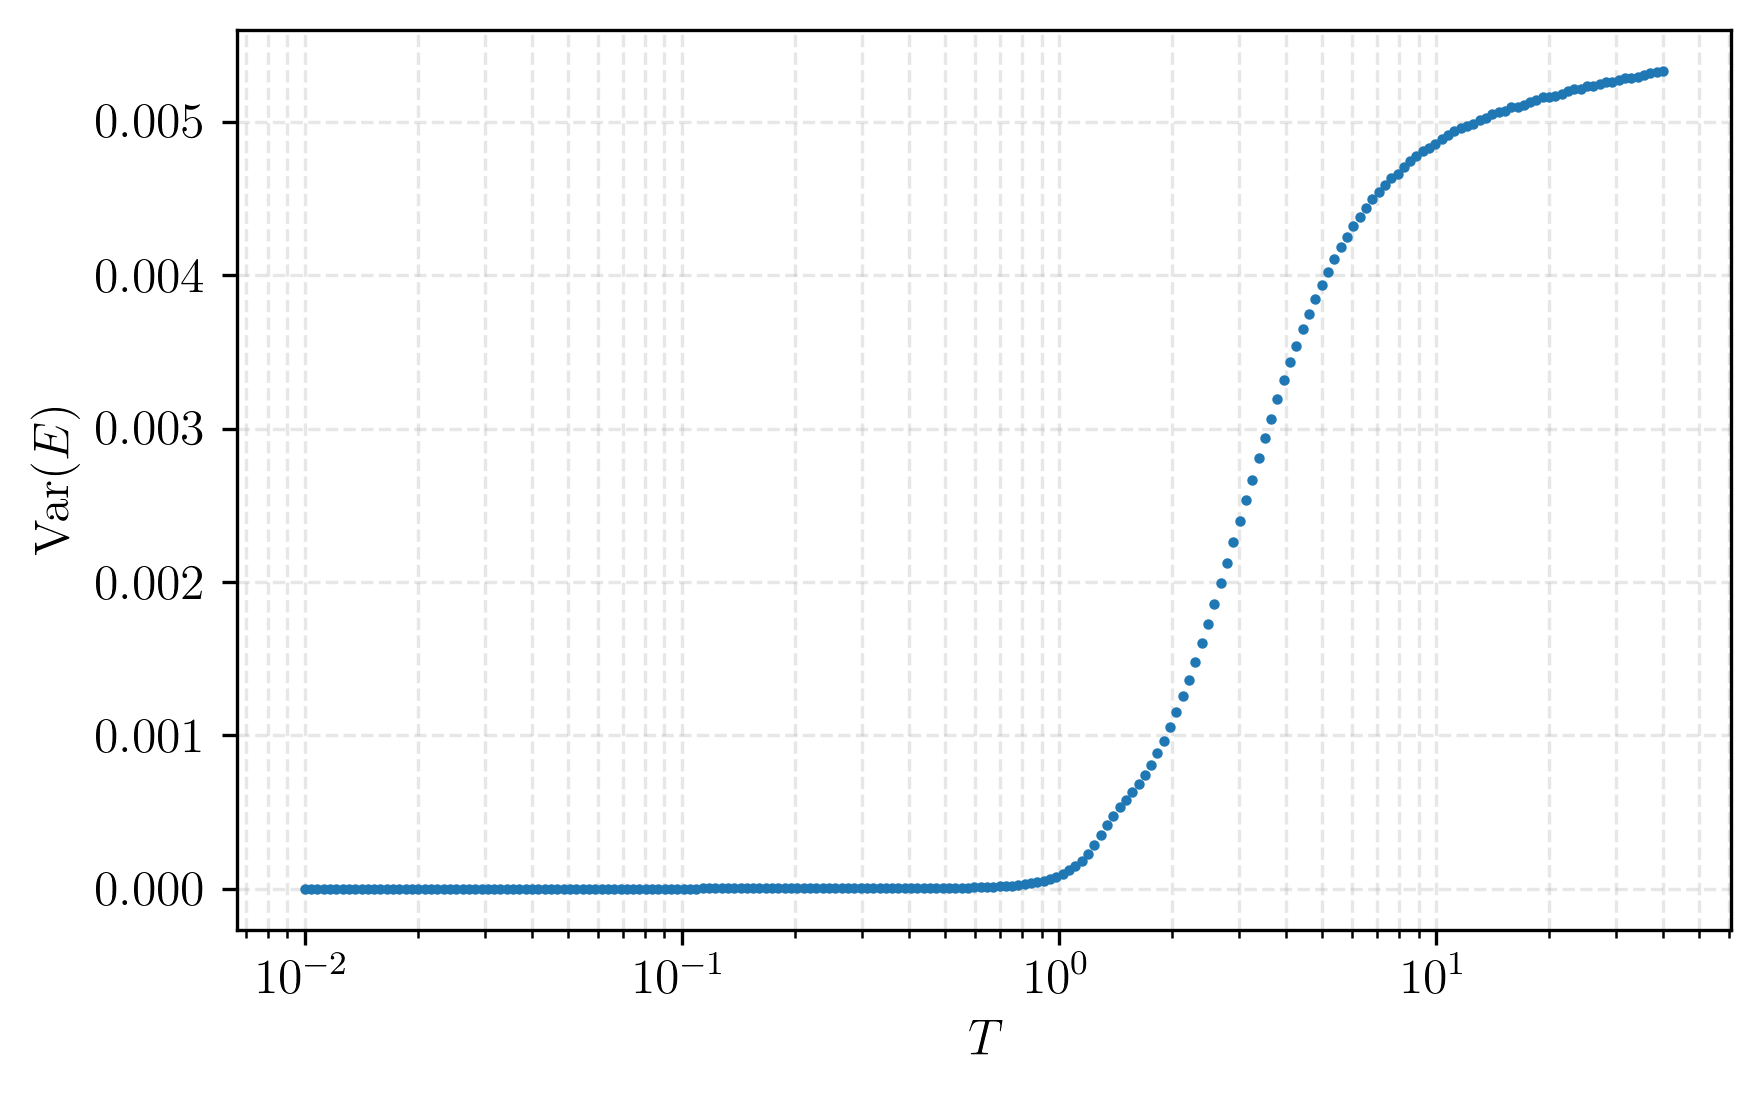

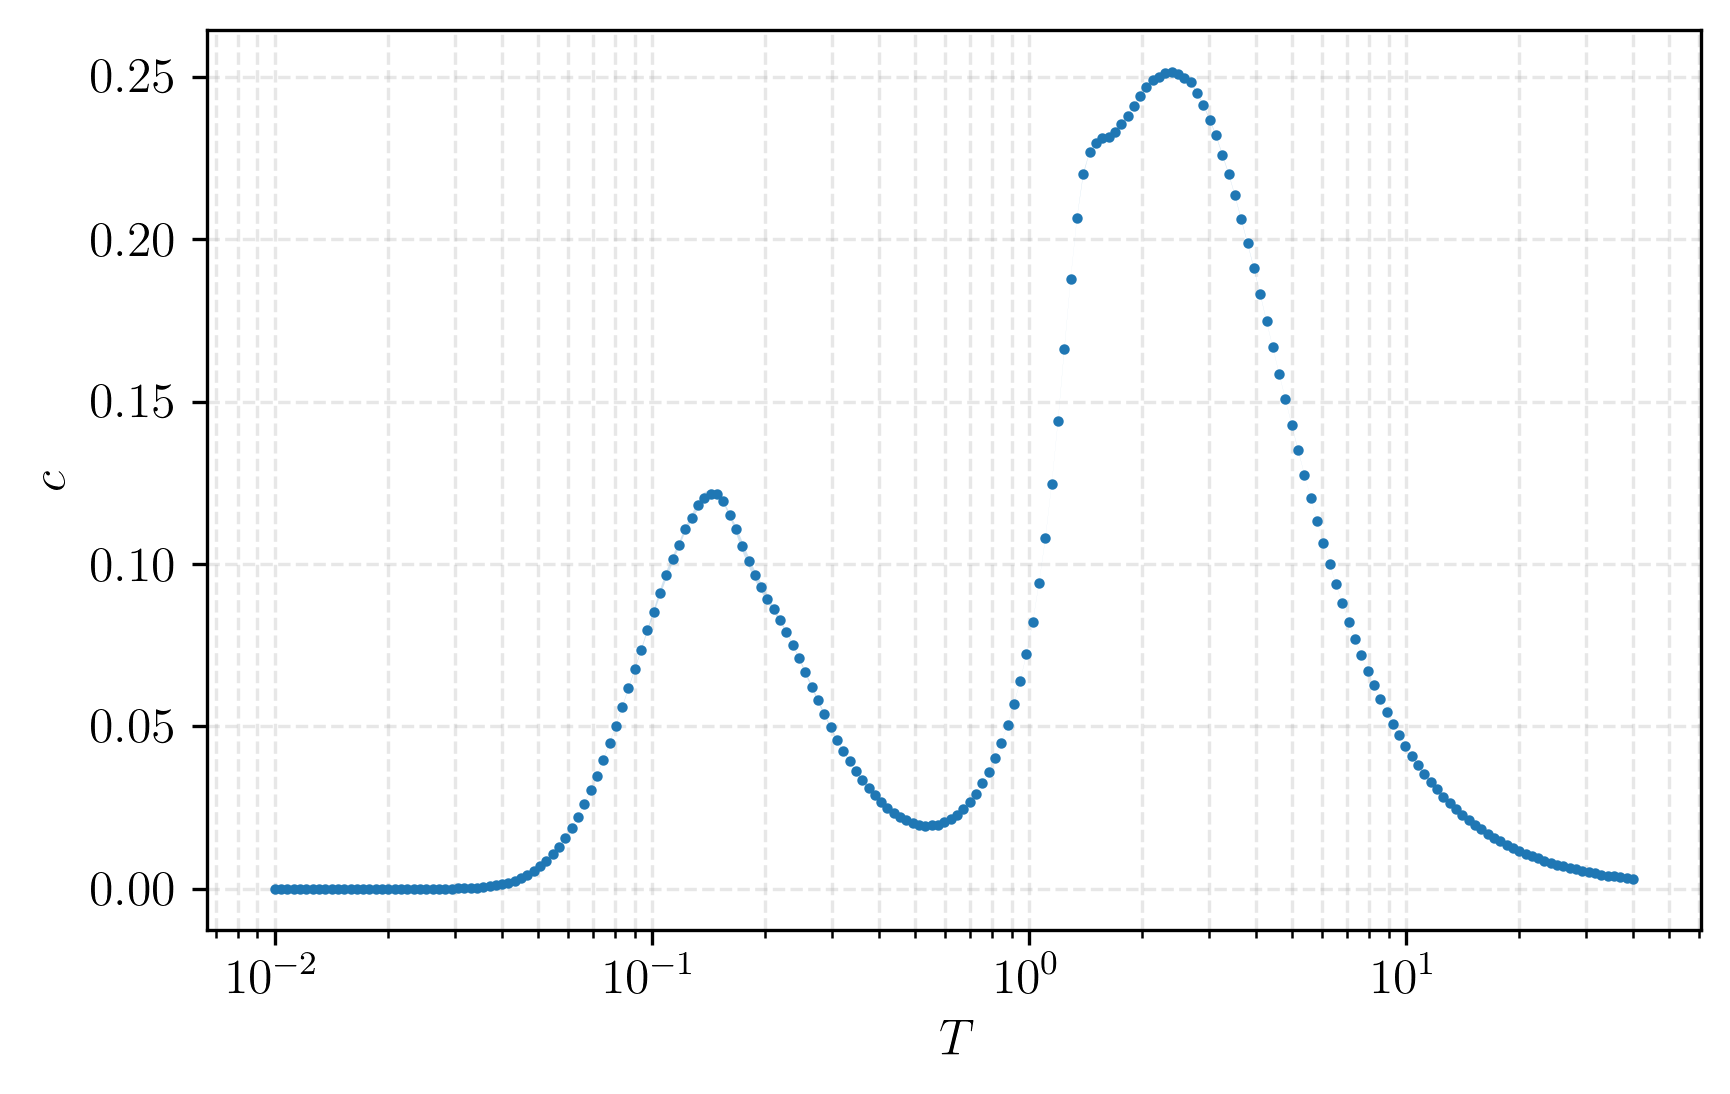

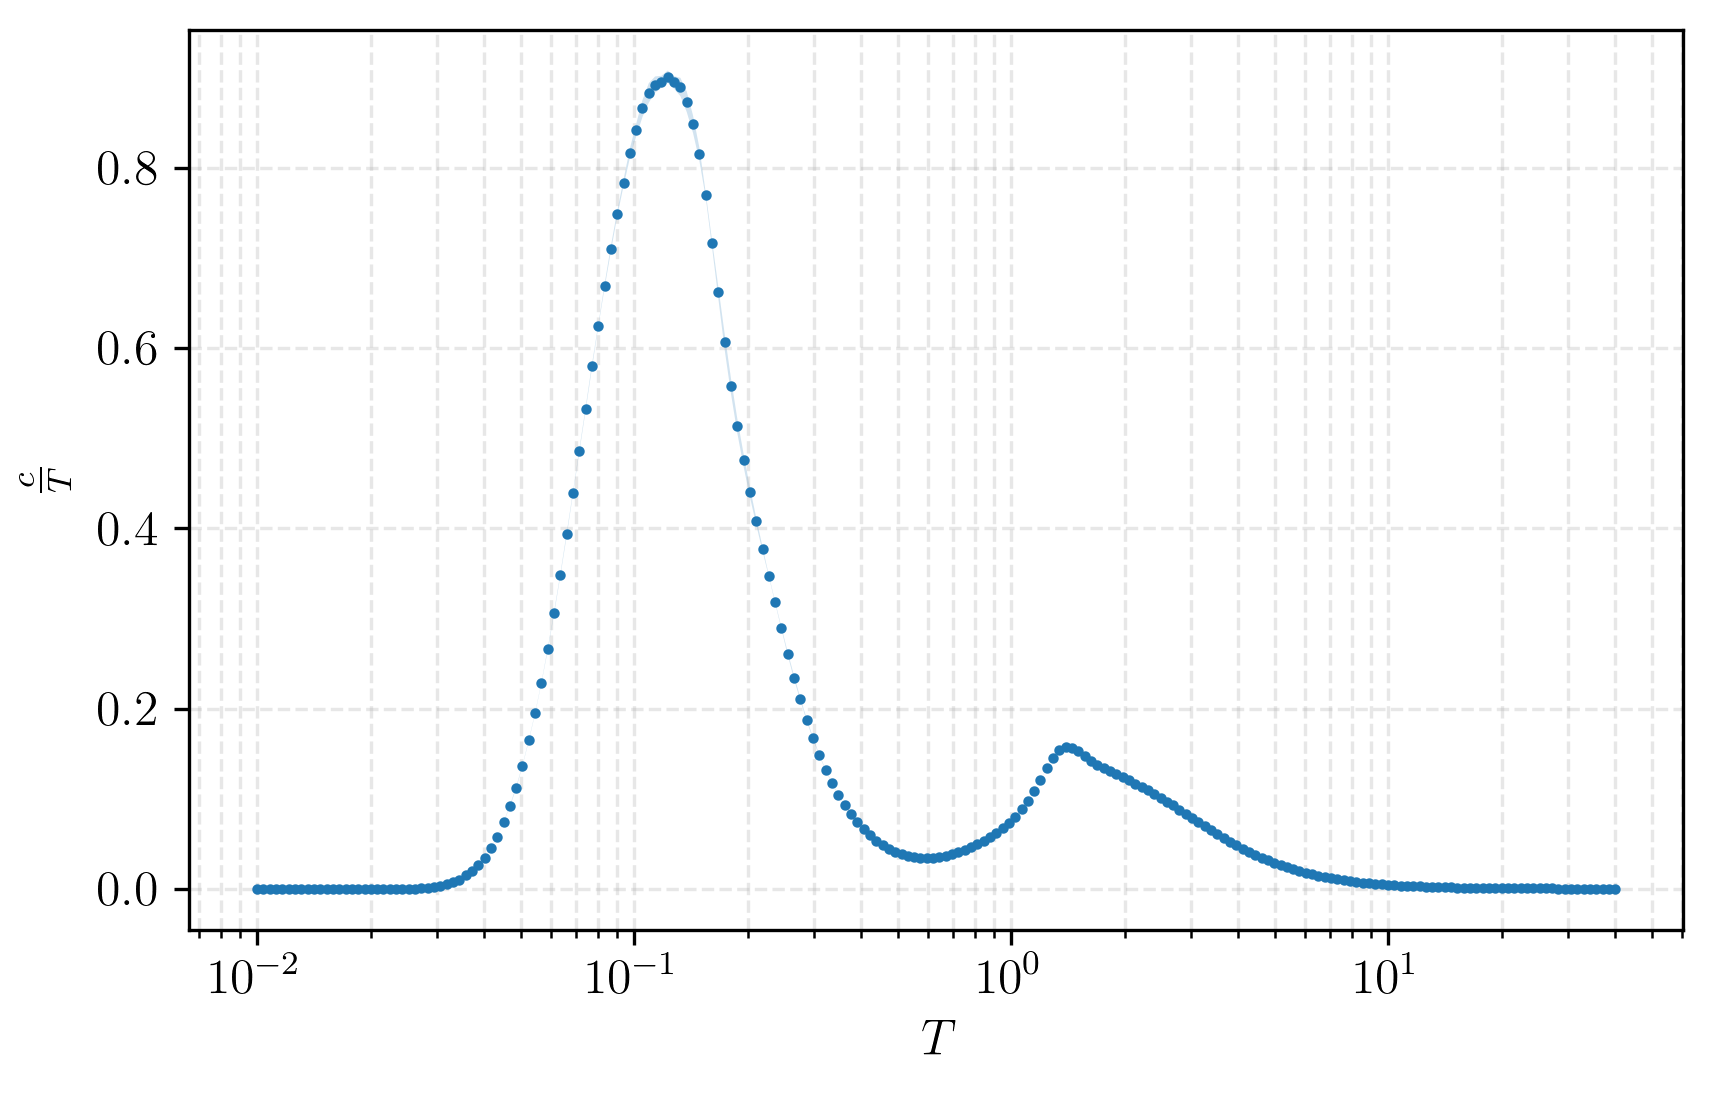

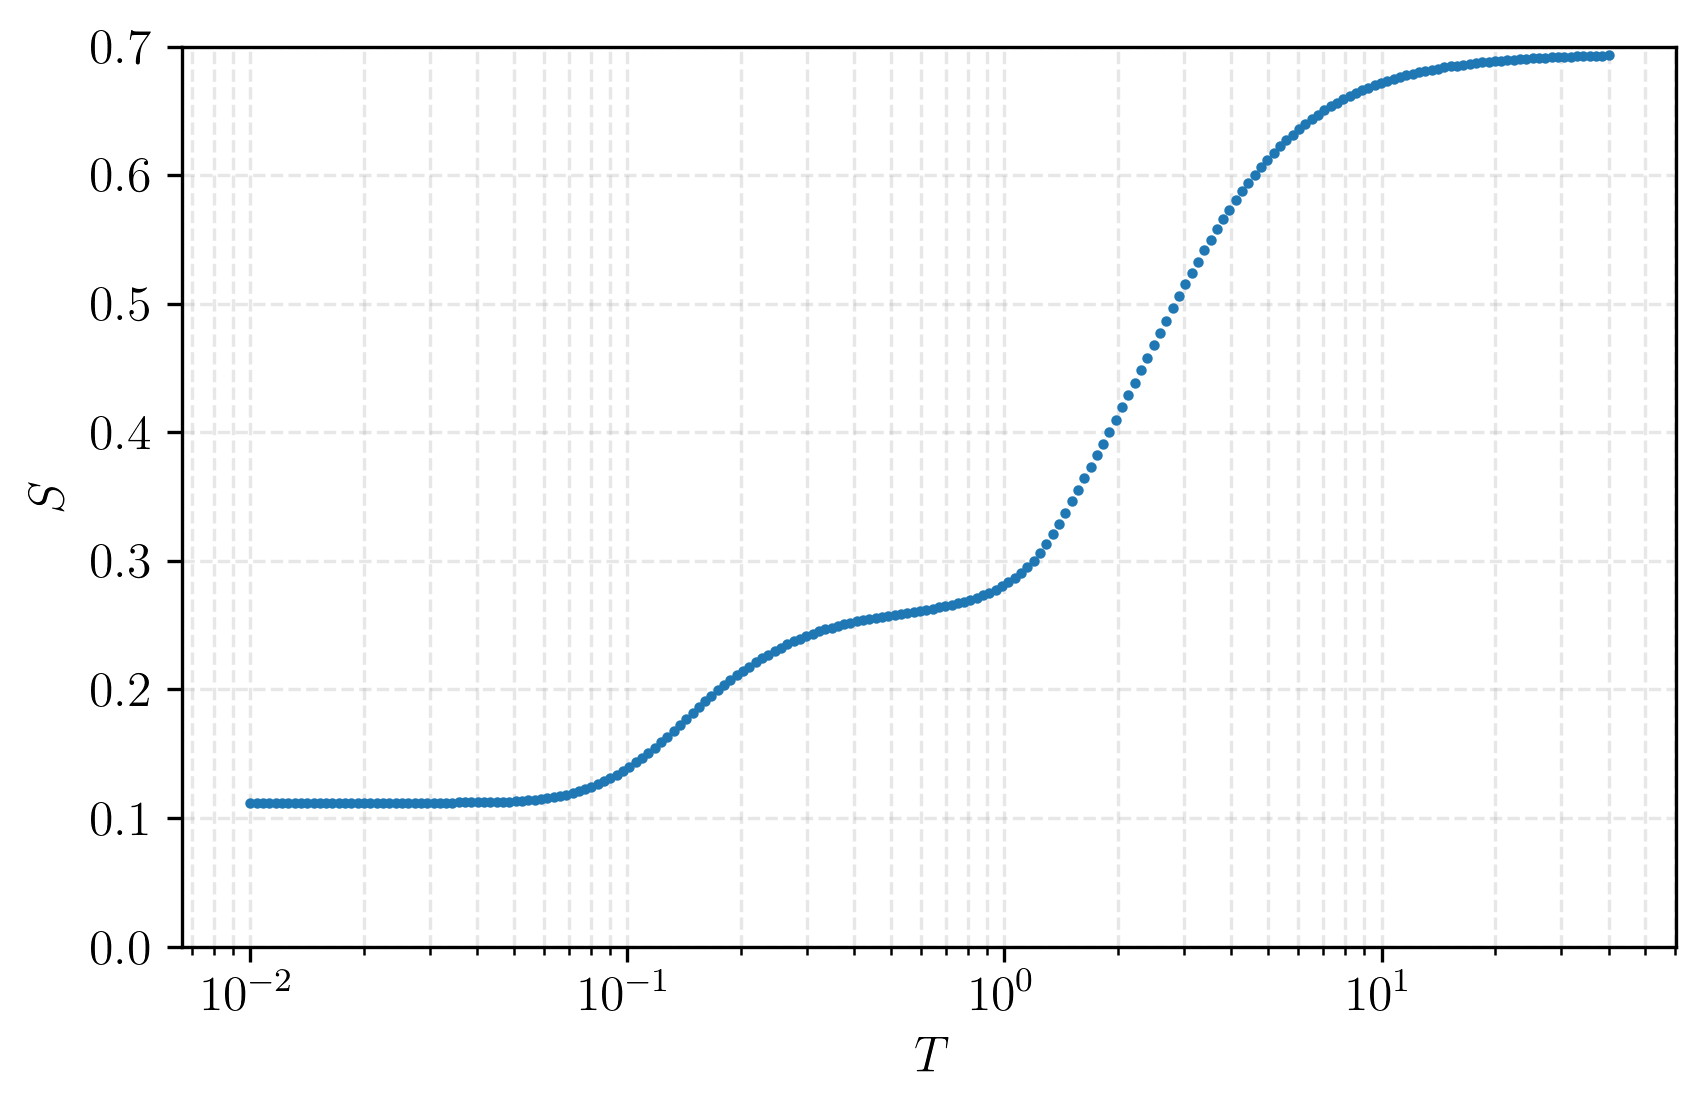

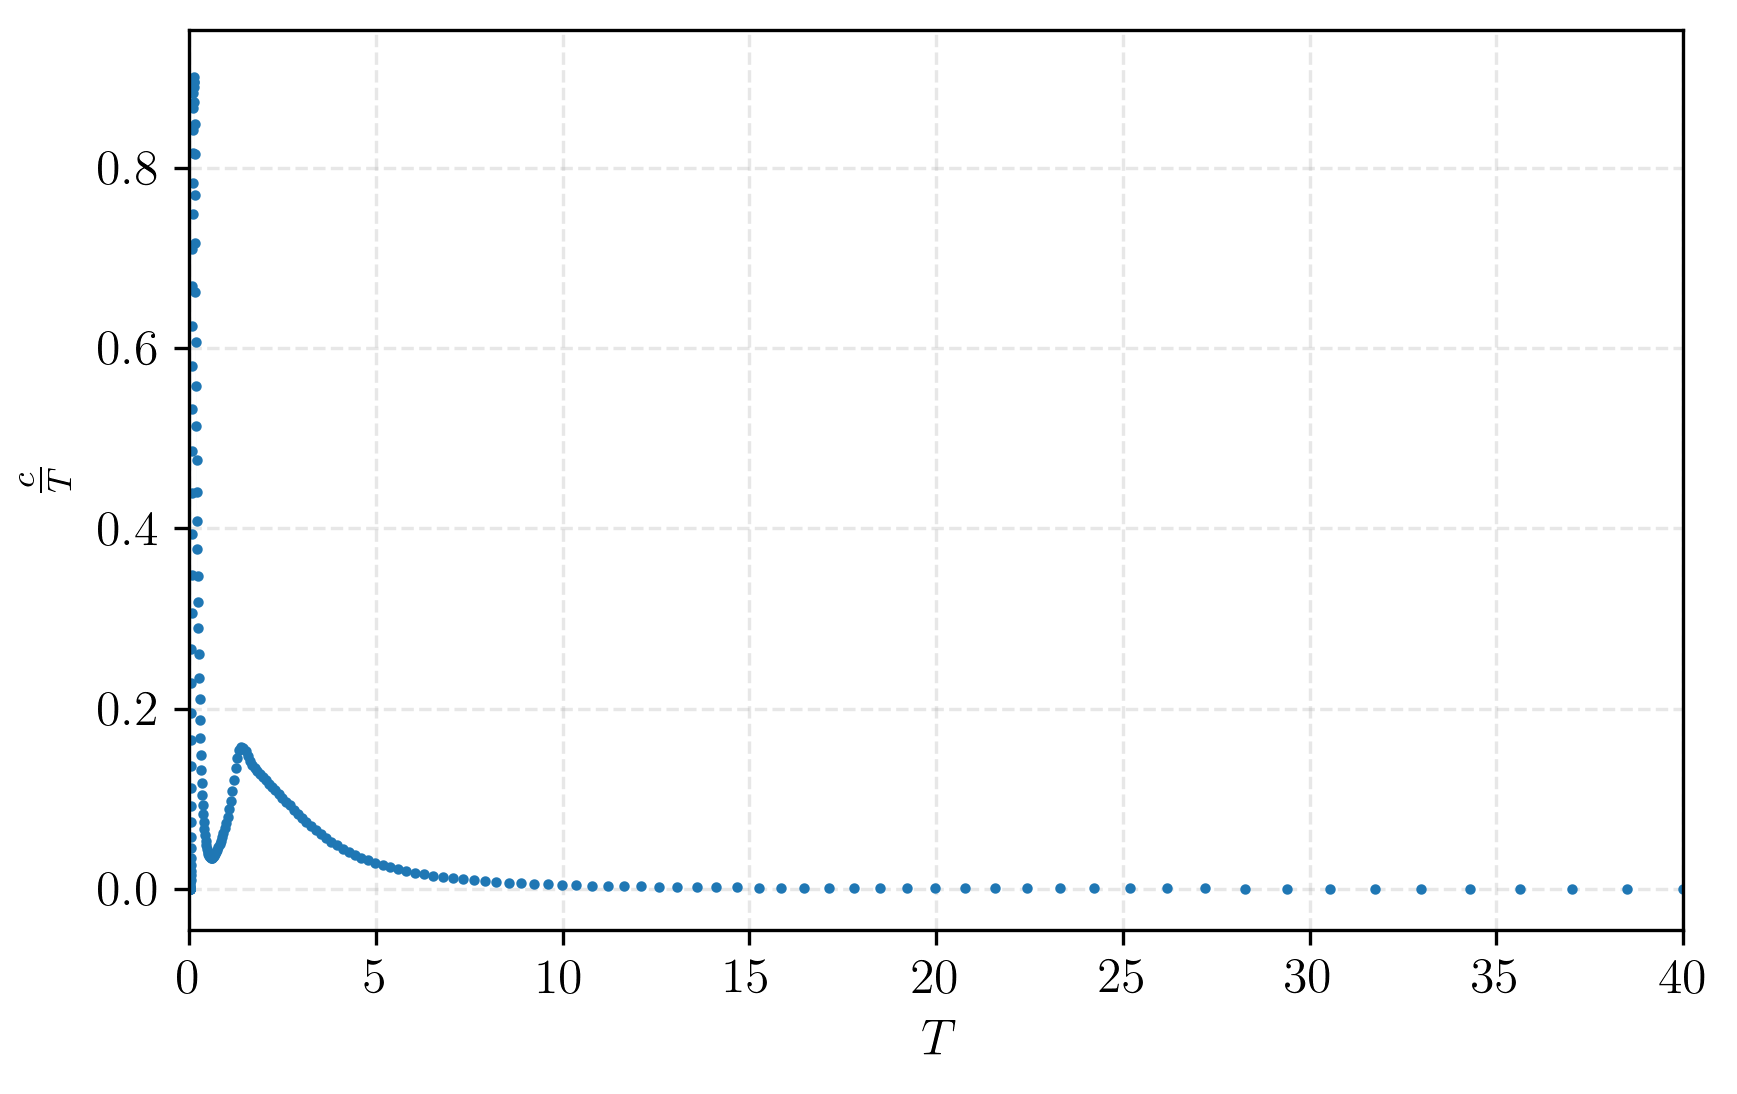

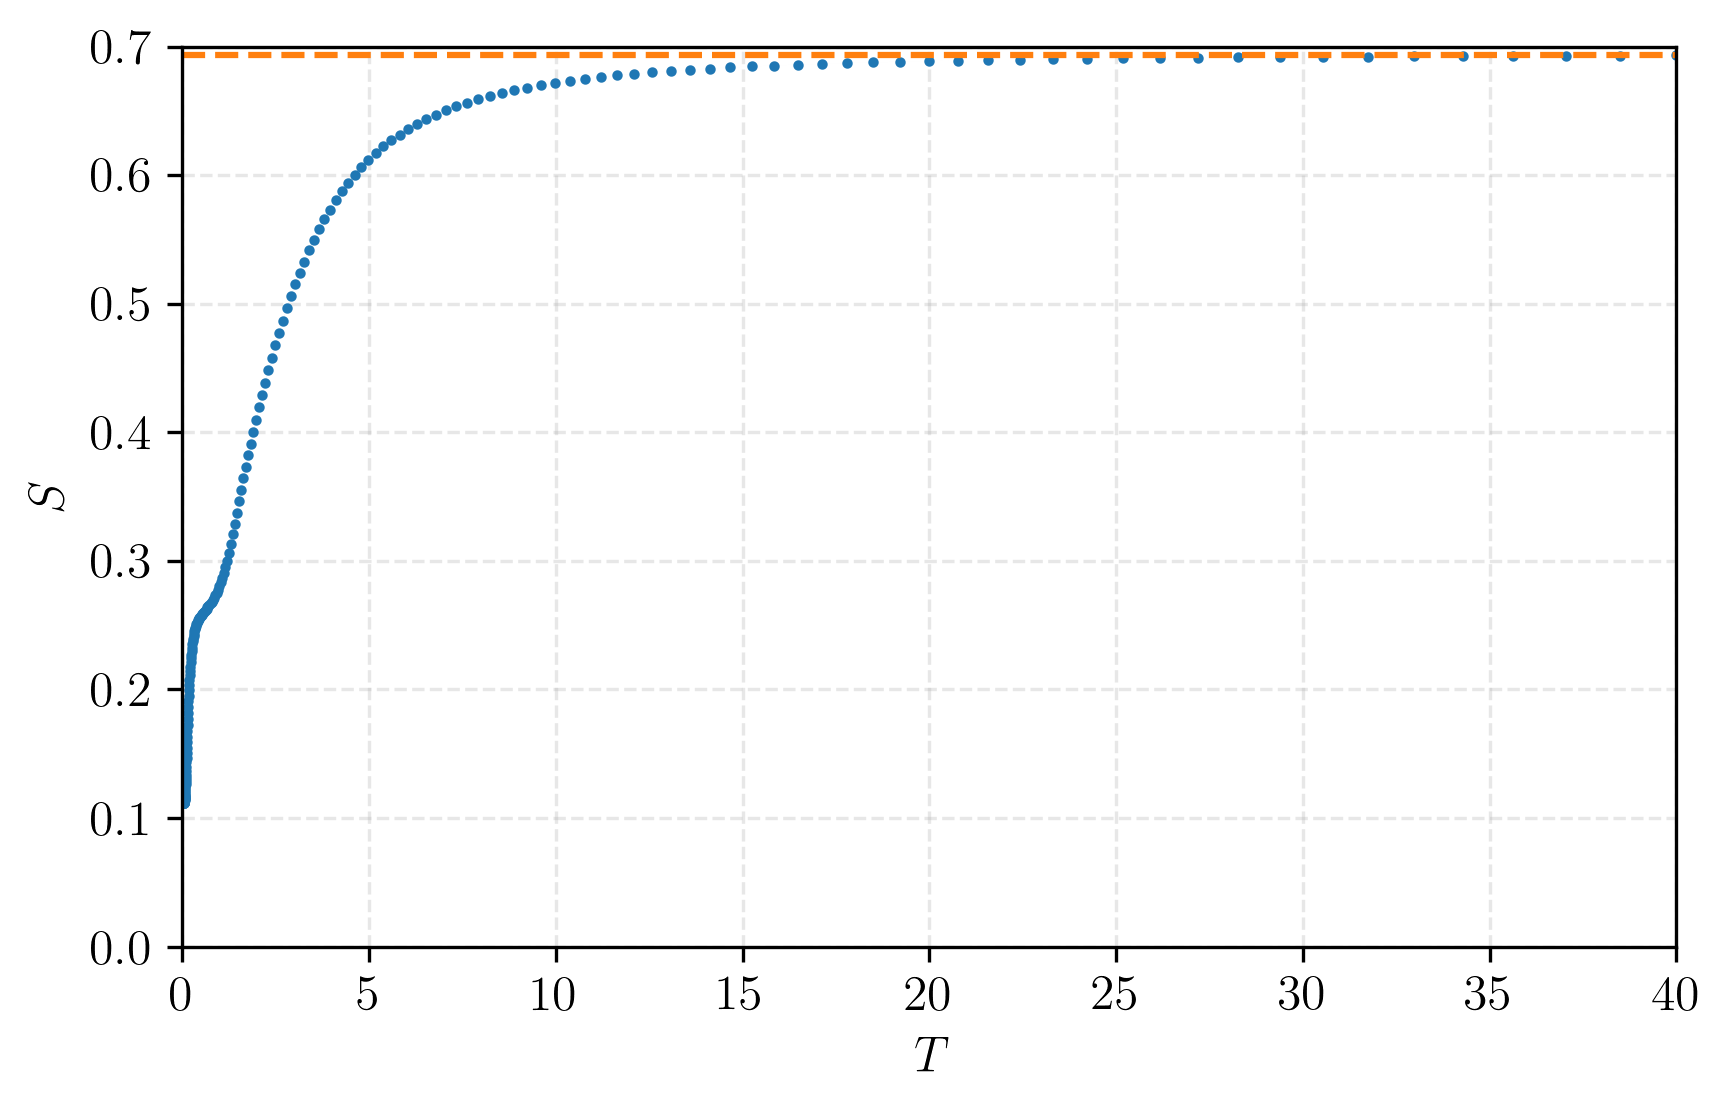

In [13]:
###########################################
        ## STATISTICS ANALYSIS ##
###########################################
#for i in range(n):
#    af.BasicPlotsE(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
#                    results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
#                    t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
#
#
if mergeruns:
    nplots = 1
    addsave = "_Merged_"
else:
    nplots = n
    addsave = "_IndependentRuns_"
    
tidmin = 0
put_legend = False
af.BulkPlotsE(L, nplots, 0, tidmin, tidmax, temperatures_plots, foldername,
                results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4,
              t_h_S, t_h_Smin, t_h_Smax, addsave = addsave,
              figsize = (6,4), markersize = 3, ncol = 2, loc = 'upper right',
              put_legend = put_legend)

In [14]:
if not mergeruns:
    margin = [0.15, 0.15, 0.02, 0.1]
    figsize = (6,4)
    markersize = 3
    ncol = 4
    hid = 0
    plt.figure(figsize=figsize,dpi=300)
    plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
    for i in range(1,n):
        plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_MeanE[i][tidmin:tidmax[i]][:,hid]-t_h_MeanE[0][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                          label = r'$it$ = {0}'.format(i))
        #plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
        #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
        #                  - np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),
        #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
        #                  + np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),\
        #                 alpha=alpha)
    plt.xlabel(r'$T$')
    plt.ylabel(r'$\Delta E$')
    plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
    if put_legend:
        plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorE.pdf')
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorE.png')

    margin = [0.15, 0.15, 0.02, 0.1]
    figsize = (6,4)
    markersize = 3
    ncol = 4
    hid = 0
    plt.figure(figsize=figsize,dpi=300)
    plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
    for i in range(1,n):
        plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_S[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                          label = r'$it$ = {0}'.format(i))
        #plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
        #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
        #                  - np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),
        #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
        #                  + np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),\
        #                 alpha=alpha)
    plt.xlabel(r'$T$')
    plt.ylabel(r'$\Delta S$')
    plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
    if put_legend:
        plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.pdf')
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.png')

else:
    print("S = ", t_h_S[0][0], r"+/-", max(abs(t_h_S[0][0]-t_h_Smin[0][0]),abs(t_h_S[0][0]-t_h_Smax[0][0])))

S =  [0.11204638] +/- [0.00161038]


In [15]:
if mergeruns:
    np.savetxt(foldername + results_foldername + "/AvgS.txt", t_h_S[0])
    np.savetxt(foldername + results_foldername + "/AvgSmin.txt", t_h_Smin[0])
    np.savetxt(foldername + results_foldername + "/AvgSmax.txt", t_h_Smax[0])
    np.savetxt(foldername + results_foldername + "/AvgC.txt", C[0])
    np.savetxt(foldername + results_foldername + "/ErrC.txt", ErrC[0])

In [16]:
print(foldername + results_foldername)

../../MFUs/Runs_04-09-20_EasyPhase_L10/Results_14-09-20/
